In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("us_charity_forbes_data.csv")
df

,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation
0,1,Feeding America,Domestic Needs,$4.27 B,$4.36 B,99,98,"Chicago, Illinois",$4.3B,$4.3B,$15M,$63M,$13M,$578M,100%,"$959,665"
1,2,Good 360,International Needs,$2.67 B,$2.69 B,100,100,"Alexandria, Virginia",$2.7B,$2.7B,$3M,$2M,$19M,$73M,99%,"$257,551"
2,3,United Way Worldwide,Domestic Needs,$2.6 B,$3.51 B,88,85,"Alexandria, Virginia",$3.5B,$3B,$234M,$308M,Na,Na,100%S,"$3,622,146"
3,4,St. Jude Children's Research Hospital,Medical,$2.46 B,$3.3 B,84,70,"Memphis, Tennessee",$2.4B,$1.6B,$318M,$404M,$926M,$10.2B,62%,"$1,546,372"
4,5,Direct Relief,International Needs,$2.26 B,$2.27 B,100,99,"Santa Barbara, California",$2.1B,$2.1B,$9M,$3M,$198M,$1.1B,91%,"$652,610"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Second Harvest Heartland,Domestic Needs,$199 M,$217 M,96,93,"Brooklyn Park, Minnesota",$229M,$212M,$9M,$8M,-$12M,$101M,106%,"$532,490"
96,97,Covenant House,Domestic Needs,$197 M,$343 M,85,77,"New York, New York",$262M,$203M,$29M,$29M,$81M,$394M,59%,"$369,982"
97,98,Wycliffe Bible Translators,Religious,$194 M,$194 M,94,83,"Orlando, Florida",$183M,$152M,$19M,$11M,$11M,$124M,94%,"$219,717"
98,99,Humane Society of the United States,Environment & Animals,$194 M,$166 M,77,72,"Washington, District of Columbia",$213M,$154M,$14M,$45M,-$47M,$410M,124%,"$608,129"


In [3]:
df_intl = df[df.category == "International Needs"]
df_intl

,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation
1,2,Good 360,International Needs,$2.67 B,$2.69 B,100,100,"Alexandria, Virginia",$2.7B,$2.7B,$3M,$2M,$19M,$73M,99%,"$257,551"
4,5,Direct Relief,International Needs,$2.26 B,$2.27 B,100,99,"Santa Barbara, California",$2.1B,$2.1B,$9M,$3M,$198M,$1.1B,91%,"$652,610"
6,7,Habitat for Humanity International,International Needs,$1.54 B,$2.36 B,90,82,"Atlanta, Georgia",$1.8B,$1.5B,$163M,$151M,$571M,$3.6B,63%,"$478,106"
8,9,Americares,International Needs,$1.35 B,$1.36 B,99,98,"Stamford, Connecticut",$1.4B,$1.4B,$10M,$16M,-$52M,$311M,104%S,"$555,093"
12,13,Compassion International,International Needs,$1.16 B,$1.19 B,87,81,"Colorado Springs, Colorado",$1.2B,$965M,$84M,$147M,-$6M,$404M,100%,"$476,818"
14,15,United States Fund for UNICEF,International Needs,$959 M,$1.07 B,92,90,"New York, New York",$1B,$914M,$19M,$81M,$59M,$247M,94%,"$824,677"
15,16,World Vision,International Needs,$912 M,$1.4 B,90,89,"Federal Way, Washington",$1.3B,$1.2B,$48M,$94M,$70M,$361M,92%,"$556,340"
21,22,Doctors Without Borders USA,International Needs,$678 M,$670 M,85,83,"New York, New York",$652M,$543M,$8M,$101M,$18M,$343M,97%,"$261,883"
23,24,Catholic Relief Services,International Needs,$674 M,$1.45 B,94,94,"Baltimore, Maryland",$1.4B,$1.3B,$51M,$41M,$21M,$293M,97%,"$628,777"
25,26,Task Force for Global Health,International Needs,$658 M,$738 M,100,98,"Decatur, Georgia",$736M,$725M,$11M,NaN,$1M,$77M,100%,"$444,520"


In [4]:
def parse_money(x):
    if isinstance(x, str):
        x = x.replace("$", "").strip()

        if x.endswith("B"):
            return float(x[:-1]) * 1e9
        elif x.endswith("M"):
            return float(x[:-1]) * 1e6
    return x


In [5]:
df_intl['total revenue'] = df_intl['total revenue'].apply(parse_money)
df_intl['private donations'] = df['private donations'].apply(parse_money)
df_intl['surplus_loss'] = df['surplus_loss'].apply(parse_money)
df_intl['total_expense'] = df['total_expense'].apply(parse_money)
pd.set_option('display.float_format', '{:.0f}'.format)
df_intl

C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\685850010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intl['total revenue'] = df_intl['total revenue'].apply(parse_money)
C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\685850010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intl['private donations'] = df['private donations'].apply(parse_money)
C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\685850010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation
1,2,Good 360,International Needs,2670000000,2690000000,100,100,"Alexandria, Virginia",2700000000,$2.7B,$3M,$2M,19000000,$73M,99%,"$257,551"
4,5,Direct Relief,International Needs,2260000000,2270000000,100,99,"Santa Barbara, California",2100000000,$2.1B,$9M,$3M,198000000,$1.1B,91%,"$652,610"
6,7,Habitat for Humanity International,International Needs,1540000000,2360000000,90,82,"Atlanta, Georgia",1800000000,$1.5B,$163M,$151M,571000000,$3.6B,63%,"$478,106"
8,9,Americares,International Needs,1350000000,1360000000,99,98,"Stamford, Connecticut",1400000000,$1.4B,$10M,$16M,-52000000,$311M,104%S,"$555,093"
12,13,Compassion International,International Needs,1160000000,1190000000,87,81,"Colorado Springs, Colorado",1200000000,$965M,$84M,$147M,-6000000,$404M,100%,"$476,818"
14,15,United States Fund for UNICEF,International Needs,959000000,1070000000,92,90,"New York, New York",1000000000,$914M,$19M,$81M,59000000,$247M,94%,"$824,677"
15,16,World Vision,International Needs,912000000,1400000000,90,89,"Federal Way, Washington",1300000000,$1.2B,$48M,$94M,70000000,$361M,92%,"$556,340"
21,22,Doctors Without Borders USA,International Needs,678000000,670000000,85,83,"New York, New York",652000000,$543M,$8M,$101M,18000000,$343M,97%,"$261,883"
23,24,Catholic Relief Services,International Needs,674000000,1450000000,94,94,"Baltimore, Maryland",1400000000,$1.3B,$51M,$41M,21000000,$293M,97%,"$628,777"
25,26,Task Force for Global Health,International Needs,658000000,738000000,100,98,"Decatur, Georgia",736000000,$725M,$11M,NaN,1000000,$77M,100%,"$444,520"


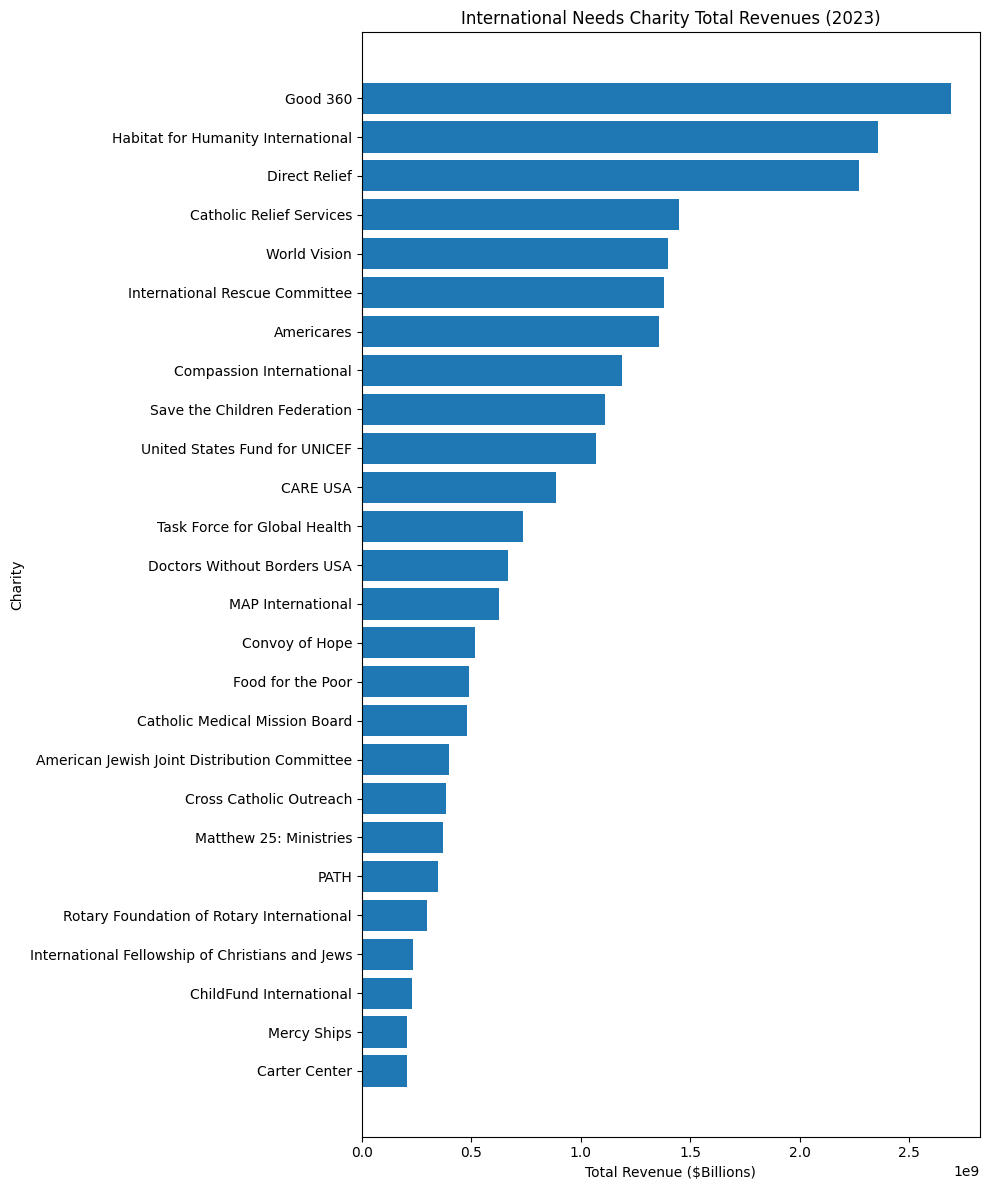

In [6]:
df_intl_revenue_sorted = df_intl.sort_values("total revenue", ascending=True)
plt.figure(figsize=(10, 12))
plt.barh(df_intl_revenue_sorted["name"], df_intl_revenue_sorted["total revenue"])
plt.xlabel("Total Revenue ($Billions)")
plt.ylabel("Charity")
plt.title("International Needs Charity Total Revenues (2023)")
plt.tight_layout()
plt.show()

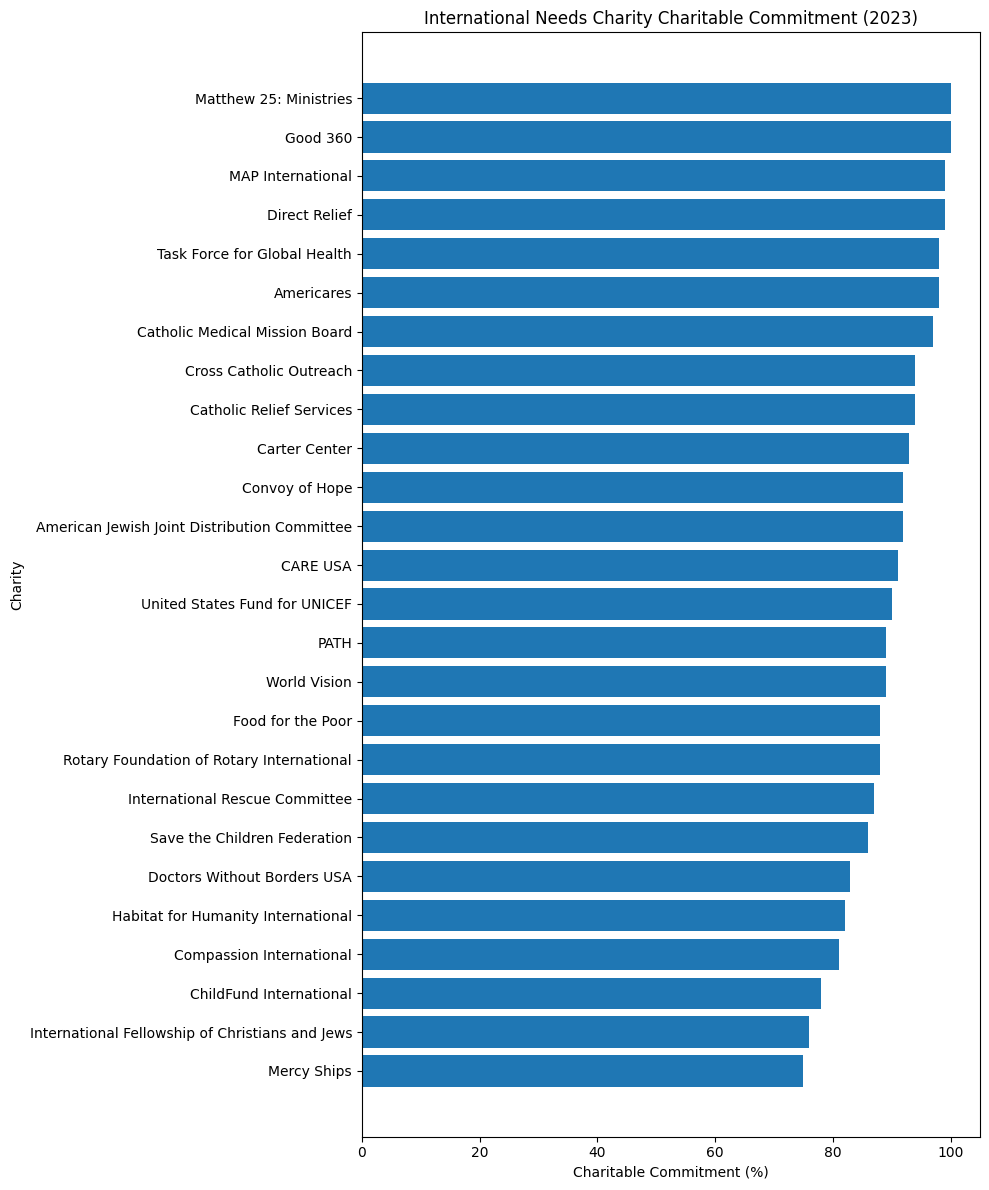

In [7]:
df_sorted_charcomm = df_intl.sort_values("charitable commitment %", ascending=True)
plt.figure(figsize=(10, 12))
plt.barh(df_sorted_charcomm["name"], df_sorted_charcomm["charitable commitment %"])
plt.xlabel("Charitable Commitment (%)")
plt.ylabel("Charity")
plt.title("International Needs Charity Charitable Commitment (2023)")
plt.tight_layout()
plt.show()

In [8]:
df_intl['surplus_loss'] = df_intl['surplus_loss'].astype(float)
df_intl['total_expense'] = df_intl['total_expense'].astype(float)
df_intl["ssi"] = df_intl["surplus_loss"]/df_intl["total_expense"]
df_intl

C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\422149306.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intl['surplus_loss'] = df_intl['surplus_loss'].astype(float)
C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\422149306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intl['total_expense'] = df_intl['total_expense'].astype(float)
C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\422149306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation,ssi
1,2,Good 360,International Needs,2670000000,2690000000,100,100,"Alexandria, Virginia",2700000000,$2.7B,$3M,$2M,19000000,$73M,99%,"$257,551",0
4,5,Direct Relief,International Needs,2260000000,2270000000,100,99,"Santa Barbara, California",2100000000,$2.1B,$9M,$3M,198000000,$1.1B,91%,"$652,610",0
6,7,Habitat for Humanity International,International Needs,1540000000,2360000000,90,82,"Atlanta, Georgia",1800000000,$1.5B,$163M,$151M,571000000,$3.6B,63%,"$478,106",0
8,9,Americares,International Needs,1350000000,1360000000,99,98,"Stamford, Connecticut",1400000000,$1.4B,$10M,$16M,-52000000,$311M,104%S,"$555,093",-0
12,13,Compassion International,International Needs,1160000000,1190000000,87,81,"Colorado Springs, Colorado",1200000000,$965M,$84M,$147M,-6000000,$404M,100%,"$476,818",-0
14,15,United States Fund for UNICEF,International Needs,959000000,1070000000,92,90,"New York, New York",1000000000,$914M,$19M,$81M,59000000,$247M,94%,"$824,677",0
15,16,World Vision,International Needs,912000000,1400000000,90,89,"Federal Way, Washington",1300000000,$1.2B,$48M,$94M,70000000,$361M,92%,"$556,340",0
21,22,Doctors Without Borders USA,International Needs,678000000,670000000,85,83,"New York, New York",652000000,$543M,$8M,$101M,18000000,$343M,97%,"$261,883",0
23,24,Catholic Relief Services,International Needs,674000000,1450000000,94,94,"Baltimore, Maryland",1400000000,$1.3B,$51M,$41M,21000000,$293M,97%,"$628,777",0
25,26,Task Force for Global Health,International Needs,658000000,738000000,100,98,"Decatur, Georgia",736000000,$725M,$11M,NaN,1000000,$77M,100%,"$444,520",0


In [9]:
df_intl['ssi_per_1000'] = df_intl['ssi'] * 1000
df_intl

C:\Users\nifty\AppData\Local\Temp\ipykernel_17832\2672233028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_intl['ssi_per_1000'] = df_intl['ssi'] * 1000


,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation,ssi,ssi_per_1000
1,2,Good 360,International Needs,2670000000,2690000000,100,100,"Alexandria, Virginia",2700000000,$2.7B,$3M,$2M,19000000,$73M,99%,"$257,551",0,7
4,5,Direct Relief,International Needs,2260000000,2270000000,100,99,"Santa Barbara, California",2100000000,$2.1B,$9M,$3M,198000000,$1.1B,91%,"$652,610",0,94
6,7,Habitat for Humanity International,International Needs,1540000000,2360000000,90,82,"Atlanta, Georgia",1800000000,$1.5B,$163M,$151M,571000000,$3.6B,63%,"$478,106",0,317
8,9,Americares,International Needs,1350000000,1360000000,99,98,"Stamford, Connecticut",1400000000,$1.4B,$10M,$16M,-52000000,$311M,104%S,"$555,093",-0,-37
12,13,Compassion International,International Needs,1160000000,1190000000,87,81,"Colorado Springs, Colorado",1200000000,$965M,$84M,$147M,-6000000,$404M,100%,"$476,818",-0,-5
14,15,United States Fund for UNICEF,International Needs,959000000,1070000000,92,90,"New York, New York",1000000000,$914M,$19M,$81M,59000000,$247M,94%,"$824,677",0,59
15,16,World Vision,International Needs,912000000,1400000000,90,89,"Federal Way, Washington",1300000000,$1.2B,$48M,$94M,70000000,$361M,92%,"$556,340",0,54
21,22,Doctors Without Borders USA,International Needs,678000000,670000000,85,83,"New York, New York",652000000,$543M,$8M,$101M,18000000,$343M,97%,"$261,883",0,28
23,24,Catholic Relief Services,International Needs,674000000,1450000000,94,94,"Baltimore, Maryland",1400000000,$1.3B,$51M,$41M,21000000,$293M,97%,"$628,777",0,15
25,26,Task Force for Global Health,International Needs,658000000,738000000,100,98,"Decatur, Georgia",736000000,$725M,$11M,NaN,1000000,$77M,100%,"$444,520",0,1


In [10]:
pd.set_option('display.float_format', '{:.6f}'.format)
df_intl.head()

,rank,name,category,private donations,total revenue,fundraising efficiency %,charitable commitment %,headquarter,total_expense,tot_exp_char_service,tot_exp_management & general,tot_exp_fundraising,surplus_loss,Net_Assets,Donor_Dependency,Highest_Compensation,ssi,ssi_per_1000
1,2,Good 360,International Needs,2670000000.000000,2690000000.000000,100,100,"Alexandria, Virginia",2700000000.000000,$2.7B,$3M,$2M,19000000.000000,$73M,99%,"$257,551",0.007037,7.037037
4,5,Direct Relief,International Needs,2260000000.000000,2270000000.000000,100,99,"Santa Barbara, California",2100000000.000000,$2.1B,$9M,$3M,198000000.000000,$1.1B,91%,"$652,610",0.094286,94.285714
6,7,Habitat for Humanity International,International Needs,1540000000.000000,2360000000.000000,90,82,"Atlanta, Georgia",1800000000.000000,$1.5B,$163M,$151M,571000000.000000,$3.6B,63%,"$478,106",0.317222,317.222222
8,9,Americares,International Needs,1350000000.000000,1360000000.000000,99,98,"Stamford, Connecticut",1400000000.000000,$1.4B,$10M,$16M,-52000000.000000,$311M,104%S,"$555,093",-0.037143,-37.142857
12,13,Compassion International,International Needs,1160000000.000000,1190000000.000000,87,81,"Colorado Springs, Colorado",1200000000.000000,$965M,$84M,$147M,-6000000.000000,$404M,100%,"$476,818",-0.005000,-5.000000


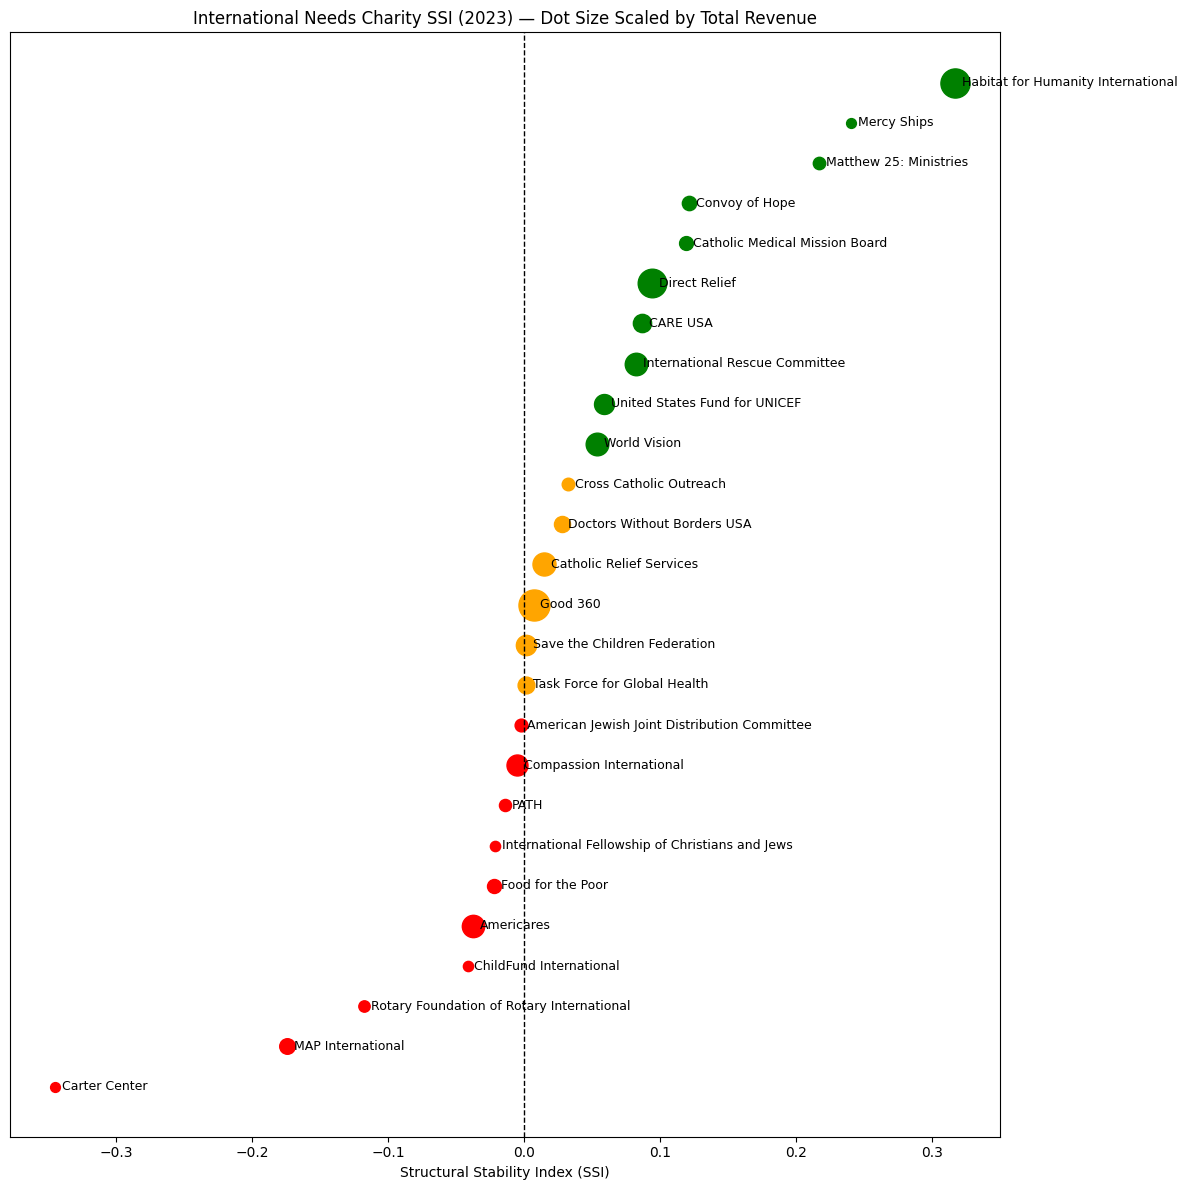

In [11]:
def ssi_color(ssi):
    if ssi < 0:
        return 'red'
    elif 0 <= ssi <= 0.05:
        return 'orange'
    elif 0.05 < ssi:
        return 'green'
df_sorted = df_intl.sort_values("ssi", ascending=True)
plt.figure(figsize=(12, 12))
max_size = 500
min_size = 50
revenue = df_sorted['total revenue']
sizes = min_size + (revenue - revenue.min()) / (revenue.max() - revenue.min()) * (max_size - min_size)
for i, (row, size) in enumerate(zip(df_sorted.itertuples(), sizes)):
    plt.scatter(row.ssi, i, color=ssi_color(row.ssi), s=size)
    plt.text(row.ssi + 0.005, i, row.name, va='center', fontsize=9)
plt.axvline(0, color='black', linewidth=1, linestyle='--')
plt.yticks([])
plt.xlabel("Structural Stability Index (SSI)")
plt.title("International Needs Charity SSI (2023) — Dot Size Scaled by Total Revenue")
plt.tight_layout()
plt.show()


